<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/PyTorch_Tutorial_13_Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://www.youtube.com/watch?v=oPhxf2fXHkQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=13)

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn

In [12]:
# hyper parameters
input_size = 784  #28*28
hidden_size = 100
num_class = 10
num_epoch = 2
batch_size = 100
learning_rate = 0.001

In [13]:
train_dataset = torchvision.datasets.MNIST(root='/content',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='/content',train=False,transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)


In [14]:
# every row of train_dataset is a tuple which is (sample,label) 
a,b =train_dataset[0]
a.shape

torch.Size([1, 28, 28])

In [15]:
# get a sample of data
example = iter(train_loader)
samples,labels = example.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


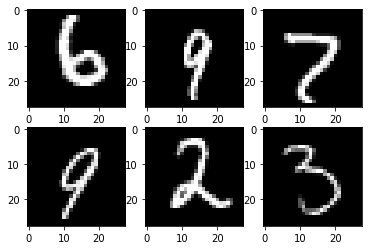

In [16]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')   #samples[i]=[1,28,28] and samples[i][0]=[28,28]

plt.show()

In [17]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_class):
    super().__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,num_class)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    y_pred = self.linear2(out)
    return y_pred

In [18]:
model = NeuralNet(input_size=input_size,hidden_size=hidden_size,num_class=num_class)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [21]:
n_total_steps = len(train_loader)

for epoch in range(num_epoch):
  for i,(images,labels) in enumerate(train_loader):  
    # images.shape:[100,1,28,28] we must reshape to [100,28*28]
    images = images.reshape(-1,784)
    y_pred = model(images)
    loss = criterion(y_pred,labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (i+1) % 100 == 0 :
      print(f'epoch = {epoch+1}/{num_epoch} , step {i+1}/{n_total_steps} ,loss = {loss.item():.4f} ')





epoch = 1/2 , step 100/600 ,loss = 0.3148 
epoch = 1/2 , step 200/600 ,loss = 0.0700 
epoch = 1/2 , step 300/600 ,loss = 0.1568 
epoch = 1/2 , step 400/600 ,loss = 0.1942 
epoch = 1/2 , step 500/600 ,loss = 0.1724 
epoch = 1/2 , step 600/600 ,loss = 0.0517 
epoch = 2/2 , step 100/600 ,loss = 0.2110 
epoch = 2/2 , step 200/600 ,loss = 0.2171 
epoch = 2/2 , step 300/600 ,loss = 0.0812 
epoch = 2/2 , step 400/600 ,loss = 0.1492 
epoch = 2/2 , step 500/600 ,loss = 0.1038 
epoch = 2/2 , step 600/600 ,loss = 0.0765 


**torch.max(input, dim, keepdim=False, *, out=None)**

Returns a namedtuple (values, indices) where values is the maximum value of each row of the input tensor in the given dimension dim. And indices is the index location of each maximum value found (argmax).

In [40]:
a = torch.randint(0,9,(4,4))
print(a)
print(torch.max(a, 1))

tensor([[0, 2, 4, 4],
        [3, 4, 5, 8],
        [0, 0, 2, 1],
        [0, 8, 1, 0]])
torch.return_types.max(
values=tensor([4, 8, 2, 8]),
indices=tensor([2, 3, 2, 1]))


In [36]:
with torch.no_grad():
  n_correct = 0.
  n_samples = 0.
  for (images,labels) in test_loader:
    images = images.reshape(-1,28*28)
    y_pred = model(images)
    _ , index = torch.max(y_pred,1)
    n_correct += torch.sum(labels==index)
    n_samples +=labels.shape[0]
  
  print(f'accuracy = {n_correct/n_samples :.4} ')
  
 

accuracy = 0.9645 
